In [1]:
## skillner extraction example 
# imports
import spacy
from spacy.matcher import PhraseMatcher
from nltk.corpus import stopwords

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor


# init params of skill extractor
import en_core_web_lg
nlp = en_core_web_lg.load()


# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher, {'test':1})

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


In [2]:

import json
import requests

response = requests.get('https://raw.githubusercontent.com/AnasAito/bucket/master/skillner/rekrut_31_07_21_translated.json')
jobs_data = json.loads(response.text)

In [3]:
# extract skills from job_description
job_description = "We need an expert in ESX servers . Fluency in both english and french is mandatory!"
def extract_Skills(text): 
      annotations = skill_extractor.annotate(text)
      skills = annotations['results']['full_matches']+annotations['results']['ngram_scored']
      keys = [skill['skill_id'] for skill in skills] 
      return keys
extract_Skills(job_description)

['KS123RD5VV5WNJLMNH3J',
 'KS123NQ6N6KV4RM7RTXJ',
 'KS123K75YYK8VGH90NCS',
 'KS1243976G466GV63ZBY']

In [4]:
skill_logs = {}
for key in jobs_data : 
   print(key)
   # job texts 
   texts = jobs_data[key]['skills_text']
   skills = []
   for text in texts : 
     try : 
         skills_ids = extract_Skills(text)
         for id_ in skills_ids : 
             skills.append(id_)
     except : 
         print(text)
   skill_logs[key]=list(set(skills))

1_0


/Users/mac/anaconda3/lib/python3.8/site-packages/skillNer/utils.py:79: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  return token1.similarity(token2)


1_1
1_2
1_3
1_4
1_5
1_6
1_7
1_8
1_9
1_10
1_11
1_12
1_13
1_14
1_15
1_16
1_17
1_18
1_19
1_20
1_21
1_22
1_23
1_24
1_25
1_26
1_27
1_28
1_29
1_30
1_31
1_32
1_33
1_34
1_35
1_36
1_37
1_38
1_39
1_40
1_41
1_42
1_43
1_44
1_45
1_46
1_47
1_48
1_49
2_0
2_1
2_2
2_3
2_4
2_5
2_6
2_7
2_8
2_9
2_10
2_11
2_12
2_13
2_14
2_15
2_16
2_17
2_18
2_19
2_20
2_21
2_22
2_23
2_24
2_25
2_26
2_27
2_28
2_29
2_30
2_31
2_32
2_33
2_34
2_35
2_36
2_37
2_38
2_39
2_40
2_41
2_42
2_43
2_44
2_45
2_46
2_47
2_48
2_49
3_0
3_1
3_2
3_3
3_4
3_5
3_6
3_7
3_8
3_9
3_10
3_11
3_12
3_13
3_14
3_15
3_16
3_17
3_18
3_19
3_20
3_21
3_22
3_23
3_24
3_25
3_26
3_27
3_28
3_29
3_30
3_31
3_32
3_33
3_34
3_35
3_36
3_37
3_38
3_39
3_40
3_41
3_42
3_43
3_44
3_45
3_46
3_47
3_48
3_49
4_0
4_1
4_2
4_3
4_4
4_5
4_6
4_7
4_8
4_9
4_10
4_11
4_12
4_13
4_14
4_15
4_16
4_17
4_18
4_19
4_20
4_21
4_22
4_23
4_24
4_25
4_26
4_27
4_28
4_29
4_30
4_31
4_32
4_33
4_34
4_35
4_36
4_37
4_38
4_39
4_40
4_41
4_42
4_43
4_44
4_45
4_46
4_47
4_48
4_49
5_0
5_1
5_2
5_3
5_4
5_5
5_6
5_7
5_8
5_9
5_10

31_19
31_20
31_21
31_22
31_23
31_24
31_25
31_26
31_27
31_28
31_29
31_30
31_31
31_32
31_33
31_34
31_35
31_36
31_37
31_38
31_39
31_40
31_41
31_42
31_43
31_44
31_45
31_46
31_47
31_48
31_49
32_0
32_1
32_2
32_3
32_4
32_5
32_6
32_7
32_8
32_9
32_10
32_11


In [5]:
unique_ids = []
for key in skill_logs : 
    for id_ in skill_logs[key]:
        if id_ not in unique_ids :
            unique_ids.append(id_)
len(unique_ids)

2575

In [9]:
3*[0]

[0, 0, 0]

In [19]:
adj = []
for id_ in unique_ids : 
    adj.append([0]*len(unique_ids))

In [20]:
for key in skill_logs : 
    for id_ in skill_logs[key]:
        for  id_b in skill_logs[key]:
            index = unique_ids.index(id_)
            index_b = unique_ids.index(id_b)
            adj[index][index_b]=adj[index][index_b]+1*(id_!=id_b)


In [21]:
import numpy as np 
from scipy.sparse import csr_matrix
adj = np.array(adj)
adj_sparse = csr_matrix(adj)

In [22]:
import networkx as nx 


G = nx.from_scipy_sparse_matrix(adj_sparse)
#draw_adjacency_matrix(G)

In [23]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

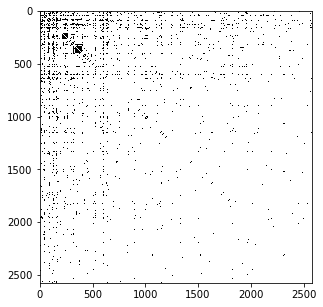

In [24]:
draw_adjacency_matrix(G)

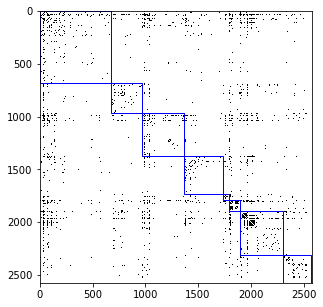

In [25]:
#!pip install python-louvain
from community import community_louvain
import collections


# Run louvain community finding algorithm
louvain_community_dict =  community_louvain.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = collections.defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])

In [26]:
attrs = {}

for i,id_ in enumerate(unique_ids) : 
    attrs[i] = {'id':id_,
                'name':SKILL_DB[id_]['skill_name']}
attrs 

{0: {'id': 'KS122556LMQ829GZCCRV', 'name': 'Communications'},
 1: {'id': 'KS440CM72NH98BKCD697', 'name': 'Writing Systems'},
 2: {'id': 'KS125WZ6TWYDMFKJ841S', 'name': 'Listening Skills'},
 3: {'id': 'ESB336F2D63F426386C0', 'name': 'Sharps Safety'},
 4: {'id': 'KSMNXY6MPS1EDWJ8P6B0', 'name': 'Enthusiasm'},
 5: {'id': 'KS1243976G466GV63ZBY', 'name': 'French Language'},
 6: {'id': 'KS1203K6FQ749NJNRBBX', 'name': 'Acceptance Testing'},
 7: {'id': 'KS121Z26S4VJLQ1WXN21', 'name': 'Customer Service'},
 8: {'id': 'KS1208C6D8DGHVYQTSLR', 'name': 'Advanced Disaster Management'},
 9: {'id': 'KS124Q3726PHM9JNS05D', 'name': 'Higher Education'},
 10: {'id': 'KS441H261TWBTZ8742XT', 'name': 'T-Code'},
 11: {'id': 'KS123R86H3SBH3T7B3LQ', 'name': 'Experience Design'},
 12: {'id': 'ESAB6ED38CE1A5A0B5A4', 'name': 'Italian Language'},
 13: {'id': 'KS121TG6T1XGL601XW9R', 'name': 'Charge Controller'},
 14: {'id': 'KSDKR3DF8CX3GPTR0MAG', 'name': 'Pixel Perfect'},
 15: {'id': 'KS1266Q5Y81S3LP0NJGW', 'name': '

In [27]:
nx.set_node_attributes(G, attrs)

In [28]:
len(G.nodes()),len(G.edges)

(2575, 107238)

In [34]:
## create max version of graph 
type(adj)

numpy.ndarray

In [37]:
adj_max = [ ]
for row in adj : 
    max_index = row.argmax()
    new_row = [0]*len(unique_ids)
    new_row[max_index] =  row[max_index]
    adj_max.append(new_row)
adj_max=np.array(adj_max)

In [40]:
adj_max_sparse = csr_matrix(adj_max)
G_max =  nx.from_scipy_sparse_matrix(adj_max_sparse)

In [41]:
len(G_max.nodes()),len(G_max.edges)

(2575, 2559)

In [46]:
nx.set_node_attributes(G_max, attrs)

In [70]:
import pandas as pd
def to_gephy(graph):
    # nodes 
    nodes = []
    for node in dict(graph.nodes(data=True)).items() : 
        k,v = node
        #print(node)
        nodes.append([k,v['name'],v['id'],SKILL_DB[v['id']]['skill_type']])
    df_nodes = pd.DataFrame(nodes,columns=['id','label','db_key','type'])
    ## edges 
    edges = list(G_max.edges(data=True))
    edges = [[e[0],e[1],e[2]['weight']]for e in edges]
    df_edges = pd.DataFrame(edges,columns=['source','target','weight'])
    return df_nodes,df_edges
n,e = to_gephy(G_max)


In [71]:
n.to_csv('nodes_m.csv',index=False)
e.to_csv('edges_m.csv',index=False)

In [99]:
# G-5_core
G_degree = nx.degree_centrality(G)

In [103]:
attrs

{0: {'id': 'KS122556LMQ829GZCCRV', 'name': 'Communications'},
 1: {'id': 'KS440CM72NH98BKCD697', 'name': 'Writing Systems'},
 2: {'id': 'KS125WZ6TWYDMFKJ841S', 'name': 'Listening Skills'},
 3: {'id': 'ESB336F2D63F426386C0', 'name': 'Sharps Safety'},
 4: {'id': 'KSMNXY6MPS1EDWJ8P6B0', 'name': 'Enthusiasm'},
 5: {'id': 'KS1243976G466GV63ZBY', 'name': 'French Language'},
 6: {'id': 'KS1203K6FQ749NJNRBBX', 'name': 'Acceptance Testing'},
 7: {'id': 'KS121Z26S4VJLQ1WXN21', 'name': 'Customer Service'},
 8: {'id': 'KS1208C6D8DGHVYQTSLR', 'name': 'Advanced Disaster Management'},
 9: {'id': 'KS124Q3726PHM9JNS05D', 'name': 'Higher Education'},
 10: {'id': 'KS441H261TWBTZ8742XT', 'name': 'T-Code'},
 11: {'id': 'KS123R86H3SBH3T7B3LQ', 'name': 'Experience Design'},
 12: {'id': 'ESAB6ED38CE1A5A0B5A4', 'name': 'Italian Language'},
 13: {'id': 'KS121TG6T1XGL601XW9R', 'name': 'Charge Controller'},
 14: {'id': 'KSDKR3DF8CX3GPTR0MAG', 'name': 'Pixel Perfect'},
 15: {'id': 'KS1266Q5Y81S3LP0NJGW', 'name': '

In [109]:
{SKILL_DB[attrs[k]['id']]['skill_name']: (attrs[k]['id'],v) for k, v in sorted(G_degree.items(), key=lambda item: item[1],reverse=True)}

{'English Language': ('KS123K75YYK8VGH90NCS', 0.6072261072261073),
 'French Language': ('KS1243976G466GV63ZBY', 0.5388500388500389),
 'Communications': ('KS122556LMQ829GZCCRV', 0.49572649572649574),
 'Experience Design': ('KS123R86H3SBH3T7B3LQ', 0.493006993006993),
 'Management': ('KS1218W78FGVPVP2KXPX', 0.47358197358197357),
 'Tool Management': ('KS441FM75ZDSSYXG6M84', 0.46814296814296813),
 'Environment Management': ('ES34A9B47D6EC1BC42D1', 0.46231546231546233),
 'Master Systems': ('KS1266Q5Y81S3LP0NJGW', 0.45765345765345766),
 'S Interface': ('KS4406N64RBDYTQX0RF3', 0.4526029526029526),
 'Quality Management': ('KS1289C6QS0TSSB4PNGG', 0.42657342657342656),
 'Excel Services': ('ES4F42744FF88B62D542', 0.42152292152292153),
 'Relational Model': ('KSBX3V1GK6YT5P55E03O', 0.38073038073038074),
 'Customer Service': ('KS121Z26S4VJLQ1WXN21', 0.3605283605283605),
 'Operations': ('KS127D361PF0FTXDZ7C4', 0.34615384615384615),
 'Solution Design': ('ES4C039C261C048676A2', 0.3442113442113442),
 'Ad

In [140]:
pr = nx.pagerank(G, alpha=0.9)

In [141]:
{SKILL_DB[attrs[k]['id']]['skill_name']: (attrs[k]['id'],v) for k, v in sorted(pr.items(), key=lambda item: item[1],reverse=True)}

{'English Language': ('KS123K75YYK8VGH90NCS', 0.015877005479407593),
 'French Language': ('KS1243976G466GV63ZBY', 0.015084466188628525),
 'Communications': ('KS122556LMQ829GZCCRV', 0.01105910456351963),
 'Management': ('KS1218W78FGVPVP2KXPX', 0.01094261390733109),
 'Experience Design': ('KS123R86H3SBH3T7B3LQ', 0.01070310946426556),
 'Master Systems': ('KS1266Q5Y81S3LP0NJGW', 0.009825925925181122),
 'S Interface': ('KS4406N64RBDYTQX0RF3', 0.009617631937524964),
 'Tool Management': ('KS441FM75ZDSSYXG6M84', 0.009162123070596771),
 'Excel Services': ('ES4F42744FF88B62D542', 0.008958014512193389),
 'Environment Management': ('ES34A9B47D6EC1BC42D1', 0.008614735214483226),
 'Quality Management': ('KS1289C6QS0TSSB4PNGG', 0.008581178877159125),
 'Relational Model': ('KSBX3V1GK6YT5P55E03O', 0.007694660103544055),
 'Listening Skills': ('KS125WZ6TWYDMFKJ841S', 0.007066064501086767),
 'Customer Service': ('KS121Z26S4VJLQ1WXN21', 0.006994256634965987),
 'Adaptability': ('KS120626HMWCXJWJC7VK', 0.006

In [152]:
import pprint
pprint.pprint(attrs)

{0: {'id': 'KS122556LMQ829GZCCRV', 'name': 'Communications'},
 1: {'id': 'KS440CM72NH98BKCD697', 'name': 'Writing Systems'},
 2: {'id': 'KS125WZ6TWYDMFKJ841S', 'name': 'Listening Skills'},
 3: {'id': 'ESB336F2D63F426386C0', 'name': 'Sharps Safety'},
 4: {'id': 'KSMNXY6MPS1EDWJ8P6B0', 'name': 'Enthusiasm'},
 5: {'id': 'KS1243976G466GV63ZBY', 'name': 'French Language'},
 6: {'id': 'KS1203K6FQ749NJNRBBX', 'name': 'Acceptance Testing'},
 7: {'id': 'KS121Z26S4VJLQ1WXN21', 'name': 'Customer Service'},
 8: {'id': 'KS1208C6D8DGHVYQTSLR', 'name': 'Advanced Disaster Management'},
 9: {'id': 'KS124Q3726PHM9JNS05D', 'name': 'Higher Education'},
 10: {'id': 'KS441H261TWBTZ8742XT', 'name': 'T-Code'},
 11: {'id': 'KS123R86H3SBH3T7B3LQ', 'name': 'Experience Design'},
 12: {'id': 'ESAB6ED38CE1A5A0B5A4', 'name': 'Italian Language'},
 13: {'id': 'KS121TG6T1XGL601XW9R', 'name': 'Charge Controller'},
 14: {'id': 'KSDKR3DF8CX3GPTR0MAG', 'name': 'Pixel Perfect'},
 15: {'id': 'KS1266Q5Y81S3LP0NJGW', 'name': '

 746: {'id': 'KS120T46WVW7G7QTLDM8',
       'name': 'Test Automation Management Tools'},
 747: {'id': 'KSX2IBZ23N66EQ3LAJIL', 'name': 'Actor Model'},
 748: {'id': 'KS1284G77CJNY040QM7B',
       'name': 'Project Management Institute (PMI) Methodology'},
 749: {'id': 'KS7G1M26G634QXZ21WQ6', 'name': 'Photoluminescence Excitation'},
 750: {'id': 'ES69297559170A17D44A',
       'name': 'Jest (JavaScript Testing Framework)'},
 751: {'id': 'ES1820DD3344258617FF', 'name': 'Bilingual (Spanish/English)'},
 752: {'id': 'KS7G8G66BTD4V8K3NCVF', 'name': 'Test-Driven Development (TDD)'},
 753: {'id': 'KS440RY76MXDWPK1WBX1', 'name': 'SONAR (Symantec)'},
 754: {'id': 'KS7YXWLEAKN8QOFDFVS2', 'name': 'Postman'},
 755: {'id': 'KSROPI9TZ82627U5HDMC', 'name': 'Web Project'},
 756: {'id': 'KSOK61DQML07YU7QTRET', 'name': 'Bitbucket'},
 757: {'id': 'ES9148E0EC1D02F9555E', 'name': 'Mocha (JavaScript Framework)'},
 758: {'id': 'KS1230N5Z09NWDLW6XVX', 'name': 'Disciplined Agile Delivery'},
 759: {'id': 'ESD80D145A

        'name': 'Hadoop Distributed File System (HDFS)'},
 1147: {'id': 'ESA68E69A441441F3A8B', 'name': 'Apache Airflow'},
 1148: {'id': 'KS7G7LF6NWQ8QQYLJ7SK',
        'name': 'Feature-Driven Development (FDD)'},
 1149: {'id': 'KS122PM76DCYL9WC89Y7', 'name': 'Data Modeling'},
 1150: {'id': 'KS680KR72KH02C5GM5TY', 'name': 'Scheduling'},
 1151: {'id': 'KS1278X6J5TWJR9ZFJ1D', 'name': 'Apache Oozie'},
 1152: {'id': 'KS440WF6T3L5BVDS78XZ', 'name': 'Sqoop'},
 1153: {'id': 'KS124R06TNNPX60QDZFM', 'name': 'Apache Hive'},
 1154: {'id': 'KS83LMP264392CT0RANM', 'name': 'Apache Yarn'},
 1155: {'id': 'KS2Z9P8GBWZ60WQUMUWP', 'name': 'Oracle Apex'},
 1156: {'id': 'KS1241Q68DTT0G7GMBBR', 'name': 'Draft (Boiler)'},
 1157: {'id': 'KS440DW5YNTB08JF1G14', 'name': 'Security Accounts Manager'},
 1158: {'id': 'KS1253Q6BT7MP2XWL90M', 'name': 'Industrialization'},
 1159: {'id': 'KS440QQ6NNV7S10DQST6', 'name': 'Software Design'},
 1160: {'id': 'KS1286T73SZHGSXG52HC', 'name': 'Public Cloud'},
 1161: {'id': 'KS1

 1662: {'id': 'KS7G3GS70SQJD8JQRLLV',
        'name': 'Operational Support And Analysis'},
 1663: {'id': 'KS125896FJ2DGH58T8LC', 'name': 'Interim Management'},
 1664: {'id': 'KS127JN607LWCRR7NKX9', 'name': 'Pair Distribution Function'},
 1665: {'id': 'KS1226F69R0RGH400DKS', 'name': 'Electrical Networks'},
 1666: {'id': 'KS124NR63ZRSNRLL3DX2', 'name': 'Large Goods Vehicle'},
 1667: {'id': 'KS124MJ6VCWYPDKW9CV6', 'name': 'Head Unit'},
 1668: {'id': 'KS1282W6V4RX7LC1FDH9', 'name': 'Production Line'},
 1669: {'id': 'KS123YH6B5Z6Q799424R', 'name': 'Financial Modeling'},
 1670: {'id': 'ESD3322CF89F7D67ED4A', 'name': 'Journeyman Electrician'},
 1671: {'id': 'KS1203870JVGL4NN4W7Z', 'name': 'Electric Generators'},
 1672: {'id': 'KS123PX6CJRGZW9J86TF', 'name': 'Evidence-Based Nursing'},
 1673: {'id': 'KS4402G6S6DZM37VHM3B', 'name': 'Reverse Engineering'},
 1674: {'id': 'KS124H86K5J42L5SLFFV',
        'name': 'Visual Programming Language (VPL)'},
 1675: {'id': 'KSM4DZWGFKK5ORF148AK', 'name': 'SD 

 2076: {'id': 'KS4419B6VY1X40C0LC96', 'name': 'Telematics'},
 2077: {'id': 'ES8674C292CA6ACF6C92', 'name': 'Project Architecture'},
 2078: {'id': 'KS120556WGBNC5V3VQXQ', 'name': 'Acquisition Processes'},
 2079: {'id': 'KS126J5787N5D1YXR0FM',
        'name': 'Microsoft Office Specialist Master'},
 2080: {'id': 'ES76EAFFCB7FAE2C51CD', 'name': 'Good Driving Record'},
 2081: {'id': 'KS127D36JHBK1S5F8NMB', 'name': 'Operations Architecture'},
 2082: {'id': 'ES18FB26C69905BC0341', 'name': 'Oracle HRMS'},
 2083: {'id': 'ES419C3415E6D056BE2B',
        'name': 'Control-M (Batch Scheduling Software)'},
 2084: {'id': 'KS1228G6YYT0JZND3RX0', 'name': 'Condition-Based Maintenance'},
 2085: {'id': 'KS1217X70KVSP515Q95M', 'name': 'Built Environment'},
 2086: {'id': 'ES628D40D5C3B27C8B7D', 'name': 'Industrial Automation'},
 2087: {'id': 'KS1239Z71LLXDMTGRJ5S', 'name': 'Economic Development'},
 2088: {'id': 'KS120BK6RN5NN5LVV63N', 'name': 'Agricultural Productivity'},
 2089: {'id': 'KS7C658V0Z5VN9S1WWYM'

 2568: {'id': 'KS441BC5YT1GQ4HXZ09S', 'name': 'Test Data'},
 2569: {'id': 'ESFBD26D5BA60E9FC4AB', 'name': 'Procedure Writing'},
 2570: {'id': 'KS440FG6X4ZJXS1H564L', 'name': 'Signing Exact English'},
 2571: {'id': 'KS125V071TCL01ZXX0FH', 'name': 'Tail Lift'},
 2572: {'id': 'ESC5D031137FBBF6F518', 'name': 'Kronos (Timekeeping Software)'},
 2573: {'id': 'KS1231Q64RBX2SYBZN95',
        'name': 'Distance Education Certification'},
 2574: {'id': 'KS125QD6THVTXDY344MP', 'name': 'Absolute Manage'}}


In [169]:
def search_id(query):
    
    for key in attrs :
        if query in attrs[key]['name'].lower():
            print(attrs[key]['name'])
            return key
  

Python (Programming Language)


341

41

In [186]:
[(attrs[n]['name'],adj[341][n] ) for n in G.neighbors(search_id('react.js'))]

React.js


[('Communications', 14),
 ('Writing Systems', 4),
 ('French Language', 19),
 ('Customer Service', 4),
 ('Higher Education', 2),
 ('Experience Design', 16),
 ('Master Systems', 13),
 ('English Language', 22),
 ('Applied Marketing', 5),
 ('Management', 5),
 ('Relational Model', 6),
 ('Succession Planning', 1),
 ('Verbal Communication Skills', 6),
 ('Interpersonal Communications', 3),
 ('Asset Management', 0),
 ('School Transport', 3),
 ('Hostile Work Environment', 1),
 ('Excel Services', 6),
 ('Environment Management', 11),
 ('Adaptability', 5),
 ('Analytical Testing', 5),
 ('Preferred Stock', 1),
 ('Capability Development', 4),
 ('Microsoft Office', 0),
 ('Structured Query Language Procedural Language (SQL PL)', 6),
 ('Problem Solving', 5),
 ('MEAN.js', 2),
 ('Object Manager', 0),
 ('Solution Design', 6),
 ('Operations', 7),
 ('Written Communication', 3),
 ('Mobility', 1),
 ('Integrity Management', 4),
 ('Demonstration Skills', 3),
 ('Contact Manager (Data Management Software)', 0),
 ('